### Autocorrelation for all stations with P data for 2005-2017:
### Fisera Ridge, Upper Clearing, Hay Meadow (2005-16)
### Kananaskis, Bow Valley, Kananaskis Pocaterra, Banff CS, Wildcat Hills (2005-16)
### Cox Hill, Compression Ridge, Ghost Diversion, Sunshine CS, Forget Me Not Mountain, Burns Creek (2005-07)

In [1]:
import numpy as np
import pandas as pd
import math
import scipy as st
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import genfromtxt

### Fisera Ridge 2325 m

FR lag 1 = 0.3
FR lag 2 = 0.078
FR lag 3 = 0.032
FR lag 4 = 0.004
FR lag 5 = 0.001


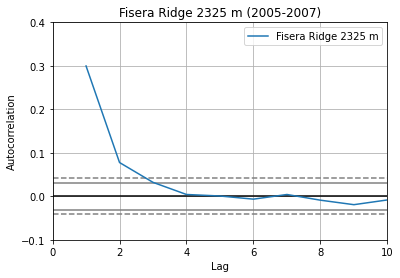

In [2]:
# Use pd.read_csv to read csv file
FRP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Version 02\Meteorology\Recent_modelling_data\time_series_inputs\FRdailyprecip.csv", 
                            header=None, names= ["date", "FR_p_mm"])
FRP_df.set_index("date", inplace=True)
# drop 1st Jan to 30th Sep 2005
FRP_df.drop(FRP_df.loc["2005-01-01":"2005-09-30"].index, inplace=True)
# drop 2nd Oct 2007 to 31st Dec 2007
FRP_df.drop(FRP_df.loc["2007-10-02":"2007-12-31"].index, inplace=True)
# FRP_df.head()

# plot autocorrelation
pd.plotting.autocorrelation_plot(FRP_df.FR_p_mm, label='Fisera Ridge 2325 m', color='tab:blue')
plt.xlim(0, 10)
plt.ylim(-0.1, 0.4)
plt.title("Fisera Ridge 2325 m (2005-2007)")
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\lag_plots_2005-2007_stns\FRlag2005-07.png')

# calculate correlation values for some lags
FRlag1 = FRP_df['FR_p_mm'].autocorr(lag=1).round(3)
FRlag2 = FRP_df['FR_p_mm'].autocorr(lag=2).round(3)
FRlag3 = FRP_df['FR_p_mm'].autocorr(lag=3).round(3)
FRlag4 = FRP_df['FR_p_mm'].autocorr(lag=4).round(3)
FRlag5 = FRP_df['FR_p_mm'].autocorr(lag=5).round(3)
print("FR lag 1 =", FRlag1)
print("FR lag 2 =", FRlag2)
print("FR lag 3 =", FRlag3)
print("FR lag 4 =", FRlag4)
print("FR lag 5 =", FRlag5)

### Sunshine CS 2187 m

SCS lag 1 = 0.464
SCS lag 2 = 0.2
SCS lag 3 = 0.192
SCS lag 4 = 0.187
SCS lag 5 = 0.184


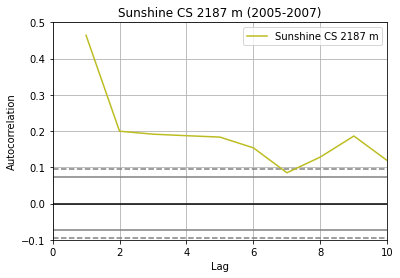

In [3]:
# Use pd.read_csv to read csv file
SCSP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Other_stations_within_50km\Sunshine_CS_2005-07\en_climate_daily_AB_3056267_2005-2007_P1D.csv", 
                               header=[0])
# rename columns
SCSP_df.rename(columns={'Date/Time':'date', 'Total Precip (mm)':'SCS_p_mm'}, inplace=True) # rename date column
# set date index
SCSP_df.set_index("date", inplace=True)
# change datetime format to YMD
SCSP_df.index = pd.to_datetime(SCSP_df.index, format = '%d/%m/%Y').strftime('%Y-%m-%d')
# drop unwanted columns
SCSP_df.drop(["Longitude (x)", "Latitude (y)", "Station Name", "Climate ID", "Year", "Month",
                      "Day", "Data Quality", "Max Temp (°C)", "Max Temp Flag", "Min Temp (°C)", "Min Temp Flag",
                      "Mean Temp (°C)", "Mean Temp Flag", "Heat Deg Days (°C)", "Heat Deg Days Flag", "Cool Deg Days (°C)",
                       "Cool Deg Days Flag", "Total Rain (mm)", "Total Rain Flag", "Total Snow (cm)", "Total Snow Flag",
                       "Total Precip Flag", "Snow on Grnd (cm)", "Snow on Grnd Flag", "Dir of Max Gust (10s deg)",
                       "Dir of Max Gust Flag", "Spd of Max Gust (km/h)", "Spd of Max Gust Flag"], axis=1, inplace=True)
# remove NaN values
SCSP_df["SCS_p_mm"] = SCSP_df["SCS_p_mm"].fillna(0)
# drop 1st Jan to 30th Sep 2005
SCSP_df.drop(SCSP_df.loc["2005-01-01":"2005-09-30"].index, inplace=True)
# drop 2nd Oct 2007 to 31st Dec 2007
SCSP_df.drop(SCSP_df.loc["2007-10-02":"2007-12-31"].index, inplace=True)

# plot autocorrelation
pd.plotting.autocorrelation_plot(SCSP_df.SCS_p_mm, label='Sunshine CS 2187 m', color='tab:olive')
plt.xlim(0, 10)
plt.ylim(-0.1, 0.5)
plt.title("Sunshine CS 2187 m (2005-2007)")
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\lag_plots_2005-2007_stns\SCSlag2005-07.png')

# calculate correlation values for some lags
SCSlag1 = SCSP_df['SCS_p_mm'].autocorr(lag=1).round(3)
SCSlag2 = SCSP_df['SCS_p_mm'].autocorr(lag=2).round(3)
SCSlag3 = SCSP_df['SCS_p_mm'].autocorr(lag=3).round(3)
SCSlag4 = SCSP_df['SCS_p_mm'].autocorr(lag=4).round(3)
SCSlag5 = SCSP_df['SCS_p_mm'].autocorr(lag=5).round(3)
print("SCS lag 1 =", SCSlag1)
print("SCS lag 2 =", SCSlag2)
print("SCS lag 3 =", SCSlag3)
print("SCS lag 4 =", SCSlag4)
print("SCS lag 5 =", SCSlag5)

In [4]:
# SCS lag plot is different to all the other stations.
# I think it's because of the string of zero P days after day 1.
SCSP_df

,SCS_p_mm
date,
2005-10-01,0.7
2005-10-02,0.0
2005-10-03,0.0
2005-10-04,0.0
2005-10-05,0.0
...,...
2007-09-27,0.0
2007-09-28,0.0
2007-09-29,0.0


### Burns Creek 1875.0 m

BC lag 1 = 0.278
BC lag 2 = 0.023
BC lag 3 = 0.043
BC lag 4 = 0.078
BC lag 5 = 0.057


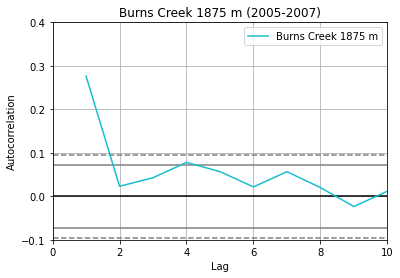

In [5]:
# Use pd.read_csv to read csv file
BCP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Other_stations_within_50km\Burns_Creek_2005-07\en_climate_daily_AB_3050974_2005-2007_P1D.csv", 
                               header=[0])
# rename columns
BCP_df.rename(columns={'Date/Time':'date', 'Total Precip (mm)':'BC_p_mm'}, inplace=True) # rename date column
# set date index
BCP_df.set_index("date", inplace=True)
# change datetime format to YMD
BCP_df.index = pd.to_datetime(BCP_df.index, format = '%d/%m/%Y').strftime('%Y-%m-%d')
# drop unwanted columns
BCP_df.drop(["Longitude (x)", "Latitude (y)", "Station Name", "Climate ID", "Year", "Month",
                      "Day", "Data Quality", "Max Temp (°C)", "Max Temp Flag", "Min Temp (°C)", "Min Temp Flag",
                      "Mean Temp (°C)", "Mean Temp Flag", "Heat Deg Days (°C)", "Heat Deg Days Flag", "Cool Deg Days (°C)",
                       "Cool Deg Days Flag", "Total Rain (mm)", "Total Rain Flag", "Total Snow (cm)", "Total Snow Flag",
                       "Total Precip Flag", "Snow on Grnd (cm)", "Snow on Grnd Flag", "Dir of Max Gust (10s deg)",
                       "Dir of Max Gust Flag", "Spd of Max Gust (km/h)", "Spd of Max Gust Flag"], axis=1, inplace=True)
# remove NaN values
BCP_df["BC_p_mm"] = BCP_df["BC_p_mm"].fillna(0)
# drop 1st Jan to 30th Sep 2005
BCP_df.drop(BCP_df.loc["2005-01-01":"2005-09-30"].index, inplace=True)
# drop 2nd Oct 2007 to 31st Dec 2007
BCP_df.drop(BCP_df.loc["2007-10-02":"2007-12-31"].index, inplace=True)

# plot autocorrelation
pd.plotting.autocorrelation_plot(BCP_df.BC_p_mm, label='Burns Creek 1875 m', color='tab:cyan')
plt.xlim(0, 10)
plt.ylim(-0.1, 0.4)
plt.title("Burns Creek 1875 m (2005-2007)")
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\lag_plots_2005-2007_stns\BClag2005-07.png')

# calculate correlation values for some lags
BClag1 = BCP_df['BC_p_mm'].autocorr(lag=1).round(3)
BClag2 = BCP_df['BC_p_mm'].autocorr(lag=2).round(3)
BClag3 = BCP_df['BC_p_mm'].autocorr(lag=3).round(3)
BClag4 = BCP_df['BC_p_mm'].autocorr(lag=4).round(3)
BClag5 = BCP_df['BC_p_mm'].autocorr(lag=5).round(3)
print("BC lag 1 =", BClag1)
print("BC lag 2 =", BClag2)
print("BC lag 3 =", BClag3)
print("BC lag 4 =", BClag4)
print("BC lag 5 =", BClag5)

### Upper Clearing 1845 m

UC lag 1 = 0.305
UC lag 2 = 0.056
UC lag 3 = 0.015
UC lag 4 = -0.004
UC lag 5 = -0.003


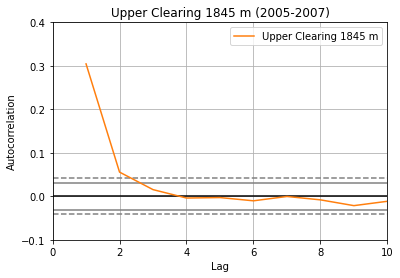

In [6]:
# Use pd.read_csv to read csv file
UCP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Version 02\Meteorology\Recent_modelling_data\time_series_inputs\UCdailyprecip.csv", 
                            header=None, names= ["date", "UC_p_mm"])
UCP_df.set_index("date", inplace=True)
# drop 1st Jan to 30th Sep 2005
UCP_df.drop(UCP_df.loc["2005-01-01":"2005-09-30"].index, inplace=True)
# drop 2nd Oct 2007 to 31st Dec 2007
UCP_df.drop(UCP_df.loc["2007-10-02":"2007-12-31"].index, inplace=True)
# UCP_df.head()

# plot autocorrelation
pd.plotting.autocorrelation_plot(UCP_df.UC_p_mm, label='Upper Clearing 1845 m', color='tab:orange')
plt.xlim(0, 10)
plt.ylim(-0.1, 0.4)
plt.title("Upper Clearing 1845 m (2005-2007)")
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\lag_plots_2005-2007_stns\UClag2005-07.png')

# calculate correlation values for some lags
UClag1 = UCP_df['UC_p_mm'].autocorr(lag=1).round(3)
UClag2 = UCP_df['UC_p_mm'].autocorr(lag=2).round(3)
UClag3 = UCP_df['UC_p_mm'].autocorr(lag=3).round(3)
UClag4 = UCP_df['UC_p_mm'].autocorr(lag=4).round(3)
UClag5 = UCP_df['UC_p_mm'].autocorr(lag=5).round(3)
print("UC lag 1 =", UClag1)
print("UC lag 2 =", UClag2)
print("UC lag 3 =", UClag3)
print("UC lag 4 =", UClag4)
print("UC lag 5 =", UClag5)

### Compression Ridge 1798.3 m

CR lag 1 = 0.225
CR lag 2 = 0.062
CR lag 3 = -0.007
CR lag 4 = 0.025
CR lag 5 = 0.025


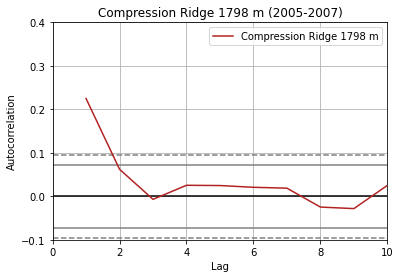

In [7]:
# Use pd.read_csv to read csv file
CRP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Other_stations_within_50km\Compression_Ridge_2005-07\en_climate_daily_AB_3051766_2005-2007_P1D.csv", 
                               header=[0])
# rename columns
CRP_df.rename(columns={'Date/Time':'date', 'Total Precip (mm)':'CR_p_mm'}, inplace=True) # rename date column
# set date index
CRP_df.set_index("date", inplace=True)
# change datetime format to YMD
CRP_df.index = pd.to_datetime(CRP_df.index, format = '%d/%m/%Y').strftime('%Y-%m-%d')
# drop unwanted columns
CRP_df.drop(["Longitude (x)", "Latitude (y)", "Station Name", "Climate ID", "Year", "Month",
                      "Day", "Data Quality", "Max Temp (°C)", "Max Temp Flag", "Min Temp (°C)", "Min Temp Flag",
                      "Mean Temp (°C)", "Mean Temp Flag", "Heat Deg Days (°C)", "Heat Deg Days Flag", "Cool Deg Days (°C)",
                       "Cool Deg Days Flag", "Total Rain (mm)", "Total Rain Flag", "Total Snow (cm)", "Total Snow Flag",
                       "Total Precip Flag", "Snow on Grnd (cm)", "Snow on Grnd Flag", "Dir of Max Gust (10s deg)",
                       "Dir of Max Gust Flag", "Spd of Max Gust (km/h)", "Spd of Max Gust Flag"], axis=1, inplace=True)
# remove NaN values
CRP_df["CR_p_mm"] = CRP_df["CR_p_mm"].fillna(0)
# drop 1st Jan to 30th Sep 2005
CRP_df.drop(CRP_df.loc["2005-01-01":"2005-09-30"].index, inplace=True)
# drop 2nd Oct 2007 to 31st Dec 2007
CRP_df.drop(CRP_df.loc["2007-10-02":"2007-12-31"].index, inplace=True)

# plot autocorrelation
pd.plotting.autocorrelation_plot(CRP_df.CR_p_mm, label='Compression Ridge 1798 m', color='firebrick')
plt.xlim(0, 10)
plt.ylim(-0.1, 0.4)
plt.title("Compression Ridge 1798 m (2005-2007)")
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\lag_plots_2005-2007_stns\CRlag2005-07.png')

# calculate correlation values for some lags
CRlag1 = CRP_df['CR_p_mm'].autocorr(lag=1).round(3)
CRlag2 = CRP_df['CR_p_mm'].autocorr(lag=2).round(3)
CRlag3 = CRP_df['CR_p_mm'].autocorr(lag=3).round(3)
CRlag4 = CRP_df['CR_p_mm'].autocorr(lag=4).round(3)
CRlag5 = CRP_df['CR_p_mm'].autocorr(lag=5).round(3)
print("CR lag 1 =", CRlag1)
print("CR lag 2 =", CRlag2)
print("CR lag 3 =", CRlag3)
print("CR lag 4 =", CRlag4)
print("CR lag 5 =", CRlag5)

### Forget Me Not Mountain 1738.6 m

FMNM lag 1 = 0.328
FMNM lag 2 = 0.083
FMNM lag 3 = 0.044
FMNM lag 4 = 0.027
FMNM lag 5 = 0.011


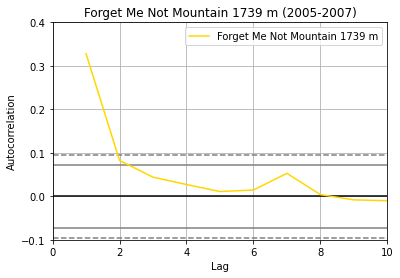

In [8]:
# Use pd.read_csv to read csv file
FMNMP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Other_stations_within_50km\Forget_Me_Not_Mountain_2005-07\en_climate_daily_AB_30526EL_2005-2007_P1D.csv", 
                               header=[0])
# rename columns
FMNMP_df.rename(columns={'Date/Time':'date', 'Total Precip (mm)':'FMNM_p_mm'}, inplace=True) # rename date column
# set date index
FMNMP_df.set_index("date", inplace=True)
# change datetime format to YMD
FMNMP_df.index = pd.to_datetime(FMNMP_df.index, format = '%d/%m/%Y').strftime('%Y-%m-%d')
# drop unwanted columns
FMNMP_df.drop(["Longitude (x)", "Latitude (y)", "Station Name", "Climate ID", "Year", "Month",
                      "Day", "Data Quality", "Max Temp (°C)", "Max Temp Flag", "Min Temp (°C)", "Min Temp Flag",
                      "Mean Temp (°C)", "Mean Temp Flag", "Heat Deg Days (°C)", "Heat Deg Days Flag", "Cool Deg Days (°C)",
                       "Cool Deg Days Flag", "Total Rain (mm)", "Total Rain Flag", "Total Snow (cm)", "Total Snow Flag",
                       "Total Precip Flag", "Snow on Grnd (cm)", "Snow on Grnd Flag", "Dir of Max Gust (10s deg)",
                       "Dir of Max Gust Flag", "Spd of Max Gust (km/h)", "Spd of Max Gust Flag"], axis=1, inplace=True)
# remove NaN values
FMNMP_df["FMNM_p_mm"] = FMNMP_df["FMNM_p_mm"].fillna(0)
# drop 1st Jan to 30th Sep 2005
FMNMP_df.drop(FMNMP_df.loc["2005-01-01":"2005-09-30"].index, inplace=True)
# drop 2nd Oct 2007 to 31st Dec 2007
FMNMP_df.drop(FMNMP_df.loc["2007-10-02":"2007-12-31"].index, inplace=True)

# plot autocorrelation
pd.plotting.autocorrelation_plot(FMNMP_df.FMNM_p_mm, label='Forget Me Not Mountain 1739 m', color='gold')
plt.xlim(0, 10)
plt.ylim(-0.1, 0.4)
plt.title("Forget Me Not Mountain 1739 m (2005-2007)")
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\lag_plots_2005-2007_stns\FMNMlag2005-07.png')

# calculate correlation values for some lags
FMNMlag1 = FMNMP_df['FMNM_p_mm'].autocorr(lag=1).round(3)
FMNMlag2 = FMNMP_df['FMNM_p_mm'].autocorr(lag=2).round(3)
FMNMlag3 = FMNMP_df['FMNM_p_mm'].autocorr(lag=3).round(3)
FMNMlag4 = FMNMP_df['FMNM_p_mm'].autocorr(lag=4).round(3)
FMNMlag5 = FMNMP_df['FMNM_p_mm'].autocorr(lag=5).round(3)
print("FMNM lag 1 =", FMNMlag1)
print("FMNM lag 2 =", FMNMlag2)
print("FMNM lag 3 =", FMNMlag3)
print("FMNM lag 4 =", FMNMlag4)
print("FMNM lag 5 =", FMNMlag5)

### Cox Hill 1674.9 m

CH lag 1 = 0.274
CH lag 2 = 0.097
CH lag 3 = -0.025
CH lag 4 = -0.014
CH lag 5 = 0.013


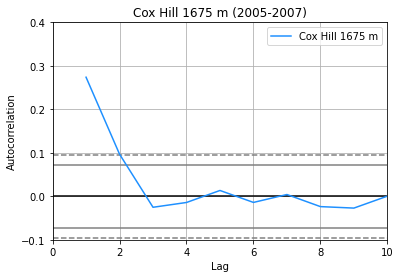

In [9]:
# Use pd.read_csv to read csv file
CHP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Other_stations_within_50km\Cox_Hill_2005-07\en_climate_daily_AB_3051932_2005-2007_P1D.csv", 
                               header=[0])
# rename columns
CHP_df.rename(columns={'Date/Time':'date', 'Total Precip (mm)':'CH_p_mm'}, inplace=True) # rename date column
# set date index
CHP_df.set_index("date", inplace=True)
# change datetime format to YMD
CHP_df.index = pd.to_datetime(CHP_df.index, format = '%d/%m/%Y').strftime('%Y-%m-%d')
# drop unwanted columns
CHP_df.drop(["Longitude (x)", "Latitude (y)", "Station Name", "Climate ID", "Year", "Month",
                      "Day", "Data Quality", "Max Temp (°C)", "Max Temp Flag", "Min Temp (°C)", "Min Temp Flag",
                      "Mean Temp (°C)", "Mean Temp Flag", "Heat Deg Days (°C)", "Heat Deg Days Flag", "Cool Deg Days (°C)",
                       "Cool Deg Days Flag", "Total Rain (mm)", "Total Rain Flag", "Total Snow (cm)", "Total Snow Flag",
                       "Total Precip Flag", "Snow on Grnd (cm)", "Snow on Grnd Flag", "Dir of Max Gust (10s deg)",
                       "Dir of Max Gust Flag", "Spd of Max Gust (km/h)", "Spd of Max Gust Flag"], axis=1, inplace=True)
# remove NaN values
CHP_df["CH_p_mm"] = CHP_df["CH_p_mm"].fillna(0)
# drop 1st Jan to 30th Sep 2005
CHP_df.drop(CHP_df.loc["2005-01-01":"2005-09-30"].index, inplace=True)
# drop 2nd Oct 2007 to 31st Dec 2007
CHP_df.drop(CHP_df.loc["2007-10-02":"2007-12-31"].index, inplace=True)

# plot autocorrelation
pd.plotting.autocorrelation_plot(CHP_df.CH_p_mm, label='Cox Hill 1675 m', color='dodgerblue')
plt.xlim(0, 10)
plt.ylim(-0.1, 0.4)
plt.title("Cox Hill 1675 m (2005-2007)")
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\lag_plots_2005-2007_stns\CHlag2005-07.png')

# calculate correlation values for some lags
CHlag1 = CHP_df['CH_p_mm'].autocorr(lag=1).round(3)
CHlag2 = CHP_df['CH_p_mm'].autocorr(lag=2).round(3)
CHlag3 = CHP_df['CH_p_mm'].autocorr(lag=3).round(3)
CHlag4 = CHP_df['CH_p_mm'].autocorr(lag=4).round(3)
CHlag5 = CHP_df['CH_p_mm'].autocorr(lag=5).round(3)
print("CH lag 1 =", CHlag1)
print("CH lag 2 =", CHlag2)
print("CH lag 3 =", CHlag3)
print("CH lag 4 =", CHlag4)
print("CH lag 5 =", CHlag5)

### Kananaskis Pocaterra 1610.0 m

KP lag 1 = 0.238
KP lag 2 = 0.081
KP lag 3 = 0.06
KP lag 4 = 0.044
KP lag 5 = 0.019


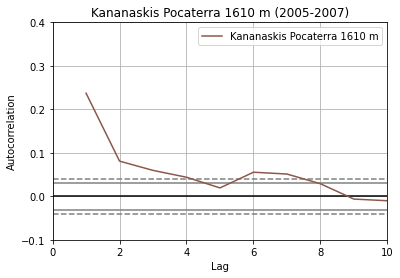

In [10]:
# Use pd.read_csv to read csv file
KPP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Other_stations_within_50km\Kananaskis_Pocaterra\en_climate_daily_AB_3053604_2005-2016_P1D.csv", 
                               header=[0])
# rename columns
KPP_df.rename(columns={'Date/Time': 'date', 'Total Precip (mm)': 'KP_p_mm'}, inplace=True) # rename date column
# set date index
KPP_df.set_index("date", inplace=True)
# change datetime format to YMD
KPP_df.index = pd.to_datetime(KPP_df.index, format = '%d/%m/%Y').strftime('%Y-%m-%d')
# drop unwanted columns
KPP_df.drop(["Longitude (x)", "Latitude (y)", "Station Name", "Climate ID", "Year", "Month",
                      "Day", "Data Quality", "Max Temp (°C)", "Max Temp Flag", "Min Temp (°C)", "Min Temp Flag",
                      "Mean Temp (°C)", "Mean Temp Flag", "Heat Deg Days (°C)", "Heat Deg Days Flag", "Cool Deg Days (°C)",
                       "Cool Deg Days Flag", "Total Rain (mm)", "Total Rain Flag", "Total Snow (cm)", "Total Snow Flag",
                       "Total Precip Flag", "Snow on Grnd (cm)", "Snow on Grnd Flag", "Dir of Max Gust (10s deg)",
                       "Dir of Max Gust Flag", "Spd of Max Gust (km/h)", "Spd of Max Gust Flag"], axis=1, inplace=True)
# remove NaN values
KPP_df["KP_p_mm"] = KPP_df["KP_p_mm"].fillna(0)
# drop 1st Jan to 30th Sep 2005
KPP_df.drop(KPP_df.loc["2005-01-01":"2005-09-30"].index, inplace=True)
# drop 2nd Oct 2007 to 31st Dec 2007
KPP_df.drop(KPP_df.loc["2007-10-02":"2007-12-31"].index, inplace=True)

# plot autocorrelation
pd.plotting.autocorrelation_plot(KPP_df.KP_p_mm, label='Kananaskis Pocaterra 1610 m', color='tab:brown')
plt.xlim(0, 10)
plt.ylim(-0.1, 0.4)
plt.title("Kananaskis Pocaterra 1610 m (2005-2007)")
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\lag_plots_2005-2007_stns\KPlag2005-07.png')

# calculate correlation values for some lags
KPlag1 = KPP_df['KP_p_mm'].autocorr(lag=1).round(3)
KPlag2 = KPP_df['KP_p_mm'].autocorr(lag=2).round(3)
KPlag3 = KPP_df['KP_p_mm'].autocorr(lag=3).round(3)
KPlag4 = KPP_df['KP_p_mm'].autocorr(lag=4).round(3)
KPlag5 = KPP_df['KP_p_mm'].autocorr(lag=5).round(3)
print("KP lag 1 =", KPlag1)
print("KP lag 2 =", KPlag2)
print("KP lag 3 =", KPlag3)
print("KP lag 4 =", KPlag4)
print("KP lag 5 =", KPlag5)

### Ghost Diversion 1600.2 m

GD lag 1 = 0.355
GD lag 2 = 0.082
GD lag 3 = -0.015
GD lag 4 = 0.004
GD lag 5 = -0.006


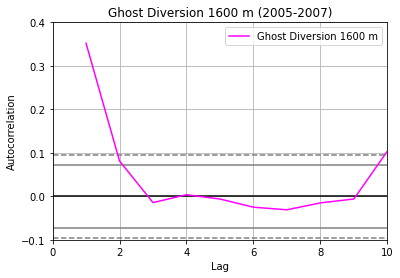

In [11]:
# Use pd.read_csv to read csv file
GDP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Other_stations_within_50km\Ghost_Diversion_2005-07\en_climate_daily_AB_3052PP6_2005-2007_P1D.csv", 
                               header=[0])
# rename columns
GDP_df.rename(columns={'Date/Time':'date', 'Total Precip (mm)':'GD_p_mm'}, inplace=True) # rename date column
# set date index
GDP_df.set_index("date", inplace=True)
# change datetime format to YMD
GDP_df.index = pd.to_datetime(GDP_df.index, format = '%d/%m/%Y').strftime('%Y-%m-%d')
# drop unwanted columns
GDP_df.drop(["Longitude (x)", "Latitude (y)", "Station Name", "Climate ID", "Year", "Month",
                      "Day", "Data Quality", "Max Temp (°C)", "Max Temp Flag", "Min Temp (°C)", "Min Temp Flag",
                      "Mean Temp (°C)", "Mean Temp Flag", "Heat Deg Days (°C)", "Heat Deg Days Flag", "Cool Deg Days (°C)",
                       "Cool Deg Days Flag", "Total Rain (mm)", "Total Rain Flag", "Total Snow (cm)", "Total Snow Flag",
                       "Total Precip Flag", "Snow on Grnd (cm)", "Snow on Grnd Flag", "Dir of Max Gust (10s deg)",
                       "Dir of Max Gust Flag", "Spd of Max Gust (km/h)", "Spd of Max Gust Flag"], axis=1, inplace=True)
# remove NaN values
GDP_df["GD_p_mm"] = GDP_df["GD_p_mm"].fillna(0)
# drop 1st Jan to 30th Sep 2005
GDP_df.drop(GDP_df.loc["2005-01-01":"2005-09-30"].index, inplace=True)
# drop 2nd Oct 2007 to 31st Dec 2007
GDP_df.drop(GDP_df.loc["2007-10-02":"2007-12-31"].index, inplace=True)

# plot autocorrelation
pd.plotting.autocorrelation_plot(GDP_df.GD_p_mm, label='Ghost Diversion 1600 m', color='fuchsia')
plt.xlim(0, 10)
plt.ylim(-0.1, 0.4)
plt.title("Ghost Diversion 1600 m (2005-2007)")
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\lag_plots_2005-2007_stns\GDlag2005-07.png')

# calculate correlation values for some lags
GDlag1 = GDP_df['GD_p_mm'].autocorr(lag=1).round(3)
GDlag2 = GDP_df['GD_p_mm'].autocorr(lag=2).round(3)
GDlag3 = GDP_df['GD_p_mm'].autocorr(lag=3).round(3)
GDlag4 = GDP_df['GD_p_mm'].autocorr(lag=4).round(3)
GDlag5 = GDP_df['GD_p_mm'].autocorr(lag=5).round(3)
print("GD lag 1 =", GDlag1)
print("GD lag 2 =", GDlag2)
print("GD lag 3 =", GDlag3)
print("GD lag 4 =", GDlag4)
print("GD lag 5 =", GDlag5)

### Hay Meadow 1436 m

HM lag 1 = 0.347
HM lag 2 = 0.074
HM lag 3 = 0.025
HM lag 4 = -0.003
HM lag 5 = -0.008


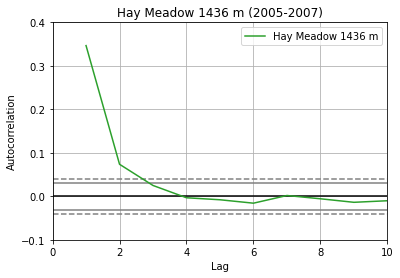

In [12]:
# Use pd.read_csv to read csv file
HMP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Version 02\Meteorology\Recent_modelling_data\time_series_inputs\HMdailyprecip.csv", 
                            header=None, names= ["date", "HM_p_mm"])
HMP_df.set_index("date", inplace=True)
# drop 1st Jan to 30th Sep 2005
HMP_df.drop(UCP_df.loc["2005-01-01":"2005-09-30"].index, inplace=True)
# drop 2nd Oct 2007 to 31st Dec 2007
HMP_df.drop(UCP_df.loc["2007-10-02":"2007-12-31"].index, inplace=True)
# HMP_df.head()

# plot autocorrelation
pd.plotting.autocorrelation_plot(HMP_df.HM_p_mm, label='Hay Meadow 1436 m', color='tab:green')
plt.xlim(0, 10)
plt.ylim(-0.1, 0.4)
plt.title("Hay Meadow 1436 m (2005-2007)")
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\lag_plots_2005-2007_stns\HMlag2005-07.png')

# calculate correlation values for some lags
HMlag1 = HMP_df['HM_p_mm'].autocorr(lag=1).round(3)
HMlag2 = HMP_df['HM_p_mm'].autocorr(lag=2).round(3)
HMlag3 = HMP_df['HM_p_mm'].autocorr(lag=3).round(3)
HMlag4 = HMP_df['HM_p_mm'].autocorr(lag=4).round(3)
HMlag5 = HMP_df['HM_p_mm'].autocorr(lag=5).round(3)
print("HM lag 1 =", HMlag1)
print("HM lag 2 =", HMlag2)
print("HM lag 3 =", HMlag3)
print("HM lag 4 =", HMlag4)
print("HM lag 5 =", HMlag5)

### Banff CS 1396.9 m

BCS lag 1 = 0.268
BCS lag 2 = 0.043
BCS lag 3 = 0.03
BCS lag 4 = 0.02
BCS lag 5 = -0.001


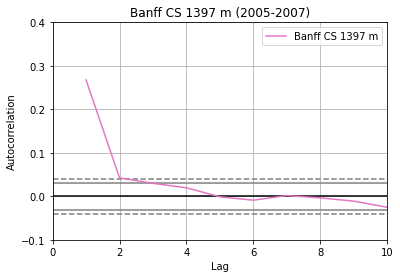

In [13]:
# Use pd.read_csv to read csv file
BCSP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Other_stations_within_50km\Banff_CS\en_climate_daily_AB_3050519_2005-2016_P1D.csv", 
                               header=[0])
# rename columns
BCSP_df.rename(columns={'Date/Time': 'date', 'Total Precip (mm)': 'BCS_p_mm'}, inplace=True) # rename date column
# set date index
BCSP_df.set_index("date", inplace=True)
# change datetime format to YMD
BCSP_df.index = pd.to_datetime(BCSP_df.index, format = '%d/%m/%Y').strftime('%Y-%m-%d')
# drop unwanted columns
BCSP_df.drop(["Longitude (x)", "Latitude (y)", "Station Name", "Climate ID", "Year", "Month",
                      "Day", "Data Quality", "Max Temp (°C)", "Max Temp Flag", "Min Temp (°C)", "Min Temp Flag",
                      "Mean Temp (°C)", "Mean Temp Flag", "Heat Deg Days (°C)", "Heat Deg Days Flag", "Cool Deg Days (°C)",
                       "Cool Deg Days Flag", "Total Rain (mm)", "Total Rain Flag", "Total Snow (cm)", "Total Snow Flag",
                       "Total Precip Flag", "Snow on Grnd (cm)", "Snow on Grnd Flag", "Dir of Max Gust (10s deg)",
                       "Dir of Max Gust Flag", "Spd of Max Gust (km/h)", "Spd of Max Gust Flag"], axis=1, inplace=True)
# remove NaN values
BCSP_df["BCS_p_mm"] = BCSP_df["BCS_p_mm"].fillna(0)
# drop 1st Jan to 30th Sep 2005
BCSP_df.drop(BCSP_df.loc["2005-01-01":"2005-09-30"].index, inplace=True)
# drop 2nd Oct 2007 to 31st Dec 2007
BCSP_df.drop(BCSP_df.loc["2007-10-02":"2007-12-31"].index, inplace=True)

# plot autocorrelation
pd.plotting.autocorrelation_plot(BCSP_df.BCS_p_mm, label='Banff CS 1397 m', color='tab:pink')
plt.xlim(0, 10)
plt.ylim(-0.1, 0.4)
plt.title("Banff CS 1397 m (2005-2007)")
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\lag_plots_2005-2007_stns\BCSlag2005-07.png')

# calculate correlation values for some lags
BCSlag1 = BCSP_df['BCS_p_mm'].autocorr(lag=1).round(3)
BCSlag2 = BCSP_df['BCS_p_mm'].autocorr(lag=2).round(3)
BCSlag3 = BCSP_df['BCS_p_mm'].autocorr(lag=3).round(3)
BCSlag4 = BCSP_df['BCS_p_mm'].autocorr(lag=4).round(3)
BCSlag5 = BCSP_df['BCS_p_mm'].autocorr(lag=5).round(3)
print("BCS lag 1 =", BCSlag1)
print("BCS lag 2 =", BCSlag2)
print("BCS lag 3 =", BCSlag3)
print("BCS lag 4 =", BCSlag4)
print("BCS lag 5 =", BCSlag5)

### Kananaskis 1391.1 m

K lag 1 = 0.318
K lag 2 = 0.098
K lag 3 = 0.032
K lag 4 = 0.027
K lag 5 = -0.007


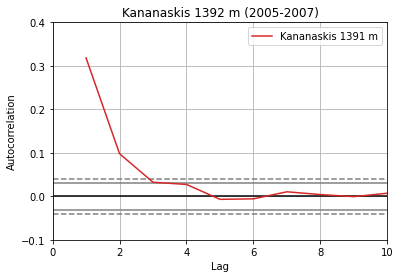

In [14]:
# Use pd.read_csv to read csv file
KP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Other_stations_within_50km\Kananaskis\en_climate_daily_AB_3053600_2005-2016_P1D.csv", 
                               header=[0])
# rename columns
KP_df.rename(columns={'Date/Time': 'date', 'Total Precip (mm)': 'K_p_mm'}, inplace=True) # rename date column
# set date index
KP_df.set_index("date", inplace=True)
# change datetime format to YMD
KP_df.index = pd.to_datetime(KP_df.index, format = '%d/%m/%Y').strftime('%Y-%m-%d')
# drop unwanted columns
KP_df.drop(["Longitude (x)", "Latitude (y)", "Station Name", "Climate ID", "Year", "Month",
                      "Day", "Data Quality", "Max Temp (°C)", "Max Temp Flag", "Min Temp (°C)", "Min Temp Flag",
                      "Mean Temp (°C)", "Mean Temp Flag", "Heat Deg Days (°C)", "Heat Deg Days Flag", "Cool Deg Days (°C)",
                       "Cool Deg Days Flag", "Total Rain (mm)", "Total Rain Flag", "Total Snow (cm)", "Total Snow Flag",
                       "Total Precip Flag", "Snow on Grnd (cm)", "Snow on Grnd Flag", "Dir of Max Gust (10s deg)",
                       "Dir of Max Gust Flag", "Spd of Max Gust (km/h)", "Spd of Max Gust Flag"], axis=1, inplace=True)
# remove NaN values
KP_df["K_p_mm"] = KP_df["K_p_mm"].fillna(0)
# drop 1st Jan to 30th Sep 2005
KP_df.drop(KP_df.loc["2005-01-01":"2005-09-30"].index, inplace=True)
# drop 2nd Oct 2007 to 31st Dec 2007
KP_df.drop(KP_df.loc["2007-10-02":"2007-12-31"].index, inplace=True)

# plot autocorrelation
pd.plotting.autocorrelation_plot(KP_df.K_p_mm, label='Kananaskis 1391 m', color='tab:red')
plt.xlim(0, 10)
plt.ylim(-0.1, 0.4)
plt.title("Kananaskis 1392 m (2005-2007)")
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\lag_plots_2005-2007_stns\Klag2005-07.png')

# calculate correlation values for some lags
Klag1 = KP_df['K_p_mm'].autocorr(lag=1).round(3)
Klag2 = KP_df['K_p_mm'].autocorr(lag=2).round(3)
Klag3 = KP_df['K_p_mm'].autocorr(lag=3).round(3)
Klag4 = KP_df['K_p_mm'].autocorr(lag=4).round(3)
Klag5 = KP_df['K_p_mm'].autocorr(lag=5).round(3)
print("K lag 1 =", Klag1)
print("K lag 2 =", Klag2)
print("K lag 3 =", Klag3)
print("K lag 4 =", Klag4)
print("K lag 5 =", Klag5)

### Bow Valley 1297.5 m

BV lag 1 = 0.332
BV lag 2 = 0.065
BV lag 3 = 0.013
BV lag 4 = 0.011
BV lag 5 = 0.024


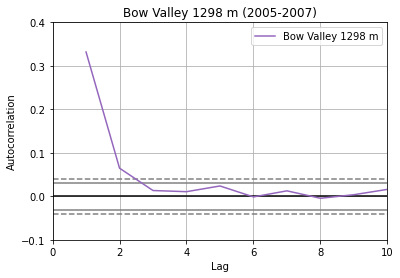

In [15]:
# Use pd.read_csv to read csv file
BVP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Other_stations_within_50km\Bow_Valley\en_climate_daily_AB_3050778_2005-2016_P1D.csv", 
                               header=[0])
# rename columns
BVP_df.rename(columns={'Date/Time': 'date', 'Total Precip (mm)': 'BV_p_mm'}, inplace=True) # rename date column
# set date index
BVP_df.set_index("date", inplace=True)
# change datetime format to YMD
BVP_df.index = pd.to_datetime(BVP_df.index, format = '%d/%m/%Y').strftime('%Y-%m-%d')
# drop unwanted columns
BVP_df.drop(["Longitude (x)", "Latitude (y)", "Station Name", "Climate ID", "Year", "Month",
                      "Day", "Data Quality", "Max Temp (°C)", "Max Temp Flag", "Min Temp (°C)", "Min Temp Flag",
                      "Mean Temp (°C)", "Mean Temp Flag", "Heat Deg Days (°C)", "Heat Deg Days Flag", "Cool Deg Days (°C)",
                       "Cool Deg Days Flag", "Total Rain (mm)", "Total Rain Flag", "Total Snow (cm)", "Total Snow Flag",
                       "Total Precip Flag", "Snow on Grnd (cm)", "Snow on Grnd Flag", "Dir of Max Gust (10s deg)",
                       "Dir of Max Gust Flag", "Spd of Max Gust (km/h)", "Spd of Max Gust Flag"], axis=1, inplace=True)
# remove NaN values
BVP_df["BV_p_mm"] = BVP_df["BV_p_mm"].fillna(0)
# drop 1st Jan to 30th Sep 2005
BVP_df.drop(BVP_df.loc["2005-01-01":"2005-09-30"].index, inplace=True)
# drop 2nd Oct 2007 to 31st Dec 2007
BVP_df.drop(BVP_df.loc["2007-10-02":"2007-12-31"].index, inplace=True)

# plot autocorrelation
pd.plotting.autocorrelation_plot(BVP_df.BV_p_mm, label='Bow Valley 1298 m', color='tab:purple')
plt.xlim(0, 10)
plt.ylim(-0.1, 0.4)
plt.title("Bow Valley 1298 m (2005-2007)")
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\lag_plots_2005-2007_stns\BVlag2005-07.png')

# calculate correlation values for some lags
BVlag1 = BVP_df['BV_p_mm'].autocorr(lag=1).round(3)
BVlag2 = BVP_df['BV_p_mm'].autocorr(lag=2).round(3)
BVlag3 = BVP_df['BV_p_mm'].autocorr(lag=3).round(3)
BVlag4 = BVP_df['BV_p_mm'].autocorr(lag=4).round(3)
BVlag5 = BVP_df['BV_p_mm'].autocorr(lag=5).round(3)
print("BV lag 1 =", BVlag1)
print("BV lag 2 =", BVlag2)
print("BV lag 3 =", BVlag3)
print("BV lag 4 =", BVlag4)
print("BV lag 5 =", BVlag5)

### Wildcat Hills 1268.0 m

WH lag 1 = 0.333
WH lag 2 = 0.118
WH lag 3 = 0.083
WH lag 4 = 0.06
WH lag 5 = 0.032


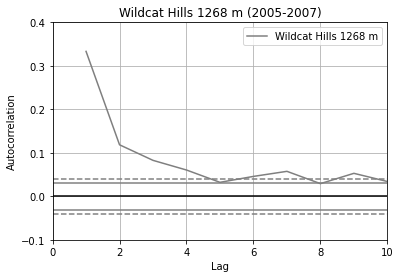

In [16]:
# Use pd.read_csv to read csv file
WHP_df = pd.read_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Hydrological_Modelling\Marmot_Creek_Research_Basin\Other_stations_within_50km\Wild_Cat_Hills\en_climate_daily_AB_3037550_2005-2016_P1D.csv", 
                               header=[0])
# rename columns
WHP_df.rename(columns={'Date/Time':'date', 'Total Precip (mm)':'WH_p_mm'}, inplace=True) # rename date column
# set date index
WHP_df.set_index("date", inplace=True)
# change datetime format to YMD
WHP_df.index = pd.to_datetime(WHP_df.index, format = '%d/%m/%Y').strftime('%Y-%m-%d')
# drop unwanted columns
WHP_df.drop(["Longitude (x)", "Latitude (y)", "Station Name", "Climate ID", "Year", "Month",
                      "Day", "Data Quality", "Max Temp (°C)", "Max Temp Flag", "Min Temp (°C)", "Min Temp Flag",
                      "Mean Temp (°C)", "Mean Temp Flag", "Heat Deg Days (°C)", "Heat Deg Days Flag", "Cool Deg Days (°C)",
                       "Cool Deg Days Flag", "Total Rain (mm)", "Total Rain Flag", "Total Snow (cm)", "Total Snow Flag",
                       "Total Precip Flag", "Snow on Grnd (cm)", "Snow on Grnd Flag", "Dir of Max Gust (10s deg)",
                       "Dir of Max Gust Flag", "Spd of Max Gust (km/h)", "Spd of Max Gust Flag"], axis=1, inplace=True)
# remove NaN values
WHP_df["WH_p_mm"] = WHP_df["WH_p_mm"].fillna(0)
# drop 1st Jan to 30th Sep 2005
WHP_df.drop(WHP_df.loc["2005-01-01":"2005-09-30"].index, inplace=True)
# drop 2nd Oct 2007 to 31st Dec 2007
WHP_df.drop(WHP_df.loc["2007-10-02":"2007-12-31"].index, inplace=True)

# plot autocorrelation
pd.plotting.autocorrelation_plot(WHP_df.WH_p_mm, label='Wildcat Hills 1268 m', color='tab:gray')
plt.xlim(0, 10)
plt.ylim(-0.1, 0.4)
plt.title("Wildcat Hills 1268 m (2005-2007)")
plt.savefig(r'C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\lag_plots_2005-2007_stns\WHlag2005-07.png')

# calculate correlation values for some lags
WHlag1 = WHP_df['WH_p_mm'].autocorr(lag=1).round(3)
WHlag2 = WHP_df['WH_p_mm'].autocorr(lag=2).round(3)
WHlag3 = WHP_df['WH_p_mm'].autocorr(lag=3).round(3)
WHlag4 = WHP_df['WH_p_mm'].autocorr(lag=4).round(3)
WHlag5 = WHP_df['WH_p_mm'].autocorr(lag=5).round(3)
print("WH lag 1 =", WHlag1)
print("WH lag 2 =", WHlag2)
print("WH lag 3 =", WHlag3)
print("WH lag 4 =", WHlag4)
print("WH lag 5 =", WHlag5)

### Create a lag dataframe

In [17]:
# step 1: initialise my lists
data = [["FR 2325 m", FRlag1, FRlag2, FRlag3, FRlag4, FRlag5],
       ["SCS 2187 m", SCSlag1, SCSlag2, SCSlag3, SCSlag4, SCSlag5],
       ["BC 1875 m", BClag1, BClag2, BClag3, BClag4, BClag5],
       ["UC 1845 m", UClag1, UClag2, UClag3, UClag4, UClag5],
       ["CR 1798 m", CRlag1, CRlag2, CRlag3, CRlag4, CRlag5],
       ["FMNM 1739 m", FMNMlag1, FMNMlag2, FMNMlag3, FMNMlag4, FMNMlag5],
       ["CH 1675 m", CHlag1, CHlag2, CHlag3, CHlag4, CHlag5], 
       ["KP 1610 m", KPlag1, KPlag2, KPlag3, KPlag4, KPlag5],
       ["GD 1600 m", GDlag1, GDlag2, GDlag3, GDlag4, GDlag5], 
       ["HM 1436 m", HMlag1, HMlag2, HMlag3, HMlag4, HMlag5],
       ["BCS 1397 m", BCSlag1, BCSlag2, BCSlag3, BCSlag4, BCSlag5], 
       ["K 1391 m", Klag1, Klag2, Klag3, Klag4, Klag5],
       ["BV 1298 m", BVlag1, BVlag2, BVlag3, BVlag4, BVlag5],
       ["WH 1268 m", WHlag1, WHlag2, WHlag3, WHlag4, WHlag5]]
data

[['FR 2325 m', 0.3, 0.078, 0.032, 0.004, 0.001],
 ['SCS 2187 m', 0.464, 0.2, 0.192, 0.187, 0.184],
 ['BC 1875 m', 0.278, 0.023, 0.043, 0.078, 0.057],
 ['UC 1845 m', 0.305, 0.056, 0.015, -0.004, -0.003],
 ['CR 1798 m', 0.225, 0.062, -0.007, 0.025, 0.025],
 ['FMNM 1739 m', 0.328, 0.083, 0.044, 0.027, 0.011],
 ['CH 1675 m', 0.274, 0.097, -0.025, -0.014, 0.013],
 ['KP 1610 m', 0.238, 0.081, 0.06, 0.044, 0.019],
 ['GD 1600 m', 0.355, 0.082, -0.015, 0.004, -0.006],
 ['HM 1436 m', 0.347, 0.074, 0.025, -0.003, -0.008],
 ['BCS 1397 m', 0.268, 0.043, 0.03, 0.02, -0.001],
 ['K 1391 m', 0.318, 0.098, 0.032, 0.027, -0.007],
 ['BV 1298 m', 0.332, 0.065, 0.013, 0.011, 0.024],
 ['WH 1268 m', 0.333, 0.118, 0.083, 0.06, 0.032]]

In [18]:
# step 2: create df from lists
lag_df = pd.DataFrame(data, columns = ["station", "lag 1", "lag 2", "lag 3", "lag 4", "lag 5"])
lag_df.set_index("station", inplace=True)
lag_df

,lag 1,lag 2,lag 3,lag 4,lag 5
station,,,,,
FR 2325 m,0.300,0.078,0.032,0.004,0.001
SCS 2187 m,0.464,0.200,0.192,0.187,0.184
BC 1875 m,0.278,0.023,0.043,0.078,0.057
UC 1845 m,0.305,0.056,0.015,-0.004,-0.003
CR 1798 m,0.225,0.062,-0.007,0.025,0.025
FMNM 1739 m,0.328,0.083,0.044,0.027,0.011
CH 1675 m,0.274,0.097,-0.025,-0.014,0.013
KP 1610 m,0.238,0.081,0.060,0.044,0.019
GD 1600 m,0.355,0.082,-0.015,0.004,-0.006


### Write dataframe to csv (Note: opening csv file in Excel shows the wrong date format (dmy) but this is an Excel glitch - ignore it!)

In [19]:
lag_df.to_csv(r"C:\Users\b1043453\OneDrive - Newcastle University\OnePlanet PhD\Random_mixing\RMWSPy_Horning_and_Haese_2021\RMWSPy-master\MCRB_examples\MCRB_gauges_only\Characterising_P_statistics\autocorr_lag_2005-2007.csv")